# Exercise 3: Statistical Learning Theory

**Note**: Please insert the names of all participating students:

1.
2.
3.
4.
5.

In [1]:
import sys, os
if 'google.colab' in sys.modules:
  if os.getcwd() == '/content':
    !git clone 'https://github.com/inb-luebeck/cs5450.git'
    os.chdir('cs5450')

Cloning into 'cs5450'...
remote: Enumerating objects: 115, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 115 (delta 31), reused 24 (delta 11), pack-reused 61
Receiving objects: 100% (115/115), 27.57 MiB | 22.56 MiB/s, done.
Resolving deltas: 100% (58/58), done.


## Exercise 3.1: k-nearest-neighbor decision boundary


In this exercise, we will use the [k-nearest-neighbor algorithm](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) for a two-class classification problem on a two-dimensional dataset. The data will be generated with the provided function gen_data. Each row in the generated matrix data corresponds to one observation and each column to a single feature. The generated array labels contains the corresponding desired output value of the two-class classification problem.

When done correctly, your code should do the following:
1. Create a random dataset using the function gen_data.
2. Shuffle the data and its corresponding labels.
3. Split the data into a disjoint train and test set.
4. Train multiple k-nearest-neighbor classifiers with different k.
5. Compute and print the train and test accuracy for each k.
6. Visualize the data and the decision boundary of the best classifier with the function show_data.

In case you are struggeling with the task, here are some helpful tips and hints:
1. Useful functions : gen_data, ['permutation'](https://docs.scipy.org/doc/numpy-1.16.1/reference/generated/numpy.random.permutation.html), ['KNeighborsClassifier'](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier), show_data
2. Good initial values are: n_clean=1000, n_noise=500, train_ratio=0.8, n_neighbors=[1,3,11,151,401].

Bonus: Instead of a fixed train-test-split, implement a k-fold cross-validation.

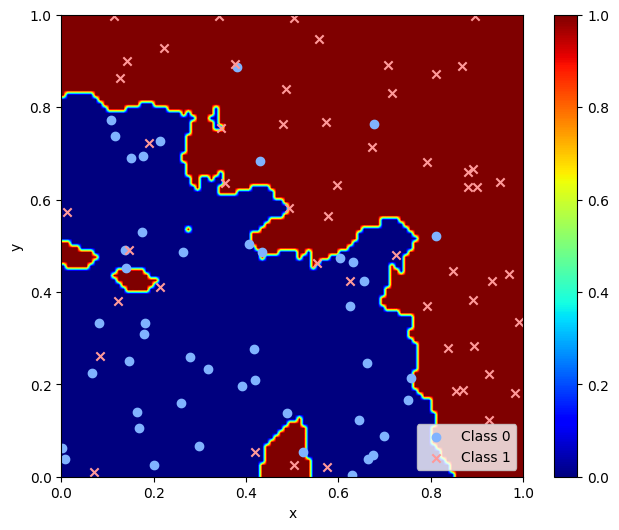

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def gen_data(n_samples, n_noise):
    """
    Generate noisy data.

    INPUT:
        n_samples : number of clean samples to generate
        n_noise : number of noisy samples to generate

    OUTPUT:
        data : 2D data points
        labels : ndarray of class labels with integer values 0 or 1
    """

    # Create clean data
    clean_data = np.random.random((n_samples, 2))
    tmp = np.linalg.norm(clean_data, axis=1)
    clean_labels = (tmp > 0.8).astype(int)

    # Create noisy data
    noisy_data = np.random.random((n_noise, 2))
    noisy_labels = np.random.randint(0, 2, n_noise)

    # Merge data
    data = np.concatenate((clean_data, noisy_data), 0)
    labels = np.concatenate((clean_labels, noisy_labels), 0)

    return data, labels

def show_data(data, labels, classifier):
    """
    Show the data and the decision boundary of the classifier.

    INPUT:
        data : 2D data points
        labels : ndarray of class labels with integer values 0 or 1
        classifier : trained classification model

    OUTPUT:
        fig : plt figure instance
    """
    # Create grid
    nx, ny = 100, 100
    x, y = np.linspace(0, 1, nx), np.linspace(0, 1, ny)
    xx, yy = np.meshgrid(x, y)
    xy = np.stack((xx.reshape(-1), yy.reshape(-1)), 1)

    # Classify grid points
    predictions = classifier.predict(xy)
    predictions = predictions.reshape(ny, nx)

    # Plot classification boundary
    fig, ax = plt.subplots(figsize=(8, 6))
    im = ax.imshow(predictions, extent=(0, 1, 0, 1), interpolation='bilinear', cmap='jet', origin='lower')
    fig.colorbar(im)

    # Plot data points
    ax.scatter(data[labels == 0, 0], data[labels == 0, 1], c=np.array([[0.5, 0.7, 1.]]), marker='o', label='Class 0')
    ax.scatter(data[labels == 1, 0], data[labels == 1, 1], c=np.array([[1., 0.6, 0.6]]), marker='x', label='Class 1')

    # Write axis labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')

    # Add legend
    ax.legend()

    return fig

# Generate data
n_samples = 50
n_noise = 50
data, labels = gen_data(n_samples, n_noise)

# Train a k-nearest neighbors classifier
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(data, labels)

# Show the data and decision boundary
show_data(data, labels, knn_classifier)
plt.show()


k =   1 	 train_accuracy = 1.000 	 test_accuracy = 0.600
k =   3 	 train_accuracy = 0.819 	 test_accuracy = 0.625
k =   5 	 train_accuracy = 0.775 	 test_accuracy = 0.650
k =   7 	 train_accuracy = 0.762 	 test_accuracy = 0.625
k =   9 	 train_accuracy = 0.756 	 test_accuracy = 0.675
k =  11 	 train_accuracy = 0.769 	 test_accuracy = 0.650
k =  13 	 train_accuracy = 0.769 	 test_accuracy = 0.625
k =  15 	 train_accuracy = 0.762 	 test_accuracy = 0.625


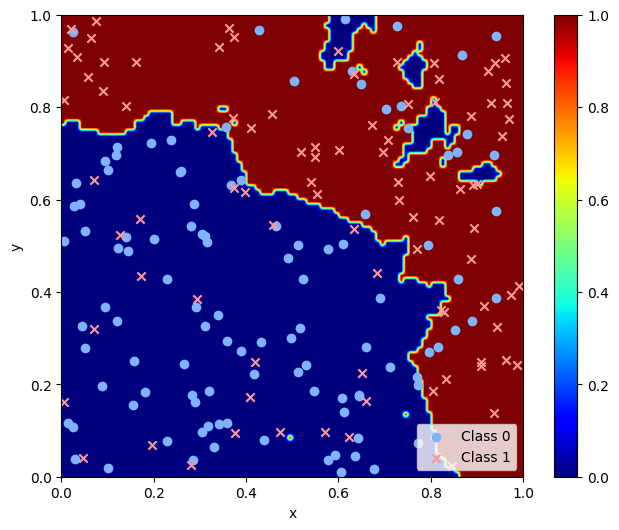

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

# Set seed for reproducible results
np.random.seed(42)

# TODO: Choose the number of clean samples
n_clean = 100

# TODO: Choose the number of noisy samples
n_noise = 100

# TODO: Choose the ratio of the training samples
train_ratio = 0.8

# TODO: Choose which k to use for nearest-neighbor (create a list with many k)
n_neighbors = [1, 3, 5, 7, 9, 11, 13, 15]

# Train and visualize the classifier and its decision boundary

# TODO: Generate data (gen_data)
data, labels = gen_data(n_clean, n_noise)

# TODO: Shuffle the data (np.random.permutation)
perm_indices = np.random.permutation(len(data))
data = data[perm_indices]
labels = labels[perm_indices]

# TODO: Split the data into train and test set
split_index = int(train_ratio * len(data))
train_data, test_data = data[:split_index], data[split_index:]
train_labels, test_labels = labels[:split_index], labels[split_index:]

# Loop over n_neighbors
best_test_accuracy = 0.0
best_classifier = None

for k in n_neighbors:
    # TODO: Train k-NN classifier (KNeighborsClassifier)
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train_data, train_labels)

    # TODO: Compute empirical accuracy for training set
    train_accuracy = knn_classifier.score(train_data, train_labels)

    # TODO: Compute test accuracy
    test_accuracy = knn_classifier.score(test_data, test_labels)

    # Print accuracies
    print('k = {:3d} \t train_accuracy = {:0.3f} \t test_accuracy = {:0.3f}'.format(k, train_accuracy, test_accuracy))

    # TODO: Save the best classifier based on test accuracy
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy
        best_classifier = knn_classifier

# TODO: Visualize the data and the decision boundary of the best classifier (show_data)
show_data(data, labels, best_classifier)
plt.show()


## Exercise 3.2: Comprehension Questions

Answer the following comprehension questions either with right or wrong and briefly explain your decision:

1. In supervised learning, unlike unsupervised learning, there is a desired output value (label) associated with every sample.

Right. In supervised learning the algorithm is trained on a labeled dataset.

2. In classification, unlike regression, the output value takes continuous values.

Wrong. In classification, the output values correspond to discrete classes or categories. On the other hand, in regression, the output values are continuous.

3. A 1-nearest-neighbor classifier has a low bias (structural risk) and a high variance (sample error).

Right. Low Bias:  It doesn't make strong assumptions about data structure.  High variance: Since it relies on the nearest neighbor, it can be sensitive to noise and small fluctuations in the data.

4. The Vapnik Chervonenkis (VC) dimension is a measure of the complexity of a classifier.

Right. The VC dimension quantifies the capacity of a classifier to perfectly fit any possible arrangement of points.

5. The higher the VC dimension, the better the generalization capability of a classifier.

Wrong. While a higher VC dimension allows a model to fit the training data more closely, it also increases the risk of overfitting.

6. Given 1001 datapoints, a 1001-nearest-neighbor classifier has a high bias (structural risk) and a high variance (sample error).

Wrong. It has high bias and low variance. High Bias: Considering all the neighbors may result in systematic errors. Low Variance:  it is less sensitive to individual data points.

7. If the VC dimension is known, Hoeffding's inequality can be used to provide an upper bound on the test error of a classification model.

Wrong. Hoeffding's inequality is a probabilistic inequality that provides an upper bound on the probability that the sum of independent and identically distributed random variables deviates from its expected value

8. Occam's razor states that one should prefer the simplest classifier that explains the data well.

Right. The idea is to avoid unnecessary complexity in models.

9. Empirical risk minimization minimizes the average error on the test set.

Wrong.  Empirical risk minimization minimizes the average error on the training set, not the test set.

10. Structural risk minimization intends to balance the empirical risk and the confidence interval.

Right. The idea behind SRM is to find a model that not only fits the training data well, but also generalizes well to unseen data to avoid overfitting.

11. In k-fold cross-validation, the original data is randomly partitioned into k equally sized overlapping subsets.

Wrong.  In k-fold cross-validation, the original data is partitioned into k equally sized non-overlapping subset.